## Data

This dataset was originally posted on Kaggle. **The key task is to predict whether a product/part will go on backorder.**

Product backorder may be the result of strong sales performance (e.g. the product is in such a high demand that production cannot keep up with sales). However, backorders can upset consumers, lead to canceled orders and decreased customer loyalty. Companies want to avoid backorders, but also avoid overstocking every product (leading to higher inventory costs).

This dataset has ~1.9 million observations of products/parts in an 8 week period. The source of the data is unreferenced.

* __Outcome__: whether the product went on backorder
* __Predictors__: Current inventory, sales history, forecasted sales, recommended stocking amount, product risk flags etc. (22 predictors in total)

The features and the target variable of the dataset are as follows:

**Description**
~~~
# Features: 
sku - Random ID for the product
national_inv - Current inventory level for the part
lead_time - Transit time for product (if available)
in_transit_qty - Amount of product in transit from source
forecast_3_month - Forecast sales for the next 3 months
forecast_6_month - Forecast sales for the next 6 months
forecast_9_month - Forecast sales for the next 9 months
sales_1_month - Sales quantity for the prior 1 month time period
sales_3_month - Sales quantity for the prior 3 month time period
sales_6_month - Sales quantity for the prior 6 month time period
sales_9_month - Sales quantity for the prior 9 month time period
min_bank - Minimum recommend amount to stock
potential_issue - Source issue for part identified
pieces_past_due - Parts overdue from source
perf_6_month_avg - Source performance for prior 6 month period
perf_12_month_avg - Source performance for prior 12 month period
local_bo_qty - Amount of stock orders overdue
deck_risk - Part risk flag
oe_constraint - Part risk flag
ppap_risk - Part risk flag
stop_auto_buy - Part risk flag
rev_stop - Part risk flag

# Target 
went_on_backorder - Product actually went on backorder
~~~

Two data files are given and the files are accessible in the JupyterHub environment:
 * `/dsa/data/all_datasets/back_order/Kaggle_Training_Dataset_v2.csv`
 * `/dsa/data/all_datasets/back_order/Kaggle_Test_Dataset_v2.csv`


 
<span style='background:yellow'>**NOTE:** The training data file is 117MB. **Do NOT try to version control any data files** (training, test, or created), you may blow-through the _push limit_.</span>  
You can easily lock up a notebook with bad coding practices.  
Please save you project early, and often, and use `git commit` to checkpoint your process.

---

# Part I: Data Preprocessing

In this part, we preprocess the given training set. 


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

import os, sys
import itertools
import numpy as np
import pandas as pd

## Load dataset

**Description**
~~~
sku - Random ID for the product
national_inv - Current inventory level for the part
lead_time - Transit time for product (if available)
in_transit_qty - Amount of product in transit from source
forecast_3_month - Forecast sales for the next 3 months
forecast_6_month - Forecast sales for the next 6 months
forecast_9_month - Forecast sales for the next 9 months
sales_1_month - Sales quantity for the prior 1 month time period
sales_3_month - Sales quantity for the prior 3 month time period
sales_6_month - Sales quantity for the prior 6 month time period
sales_9_month - Sales quantity for the prior 9 month time period
min_bank - Minimum recommend amount to stock
potential_issue - Source issue for part identified
pieces_past_due - Parts overdue from source
perf_6_month_avg - Source performance for prior 6 month period
perf_12_month_avg - Source performance for prior 12 month period
local_bo_qty - Amount of stock orders overdue
deck_risk - Part risk flag
oe_constraint - Part risk flag
ppap_risk - Part risk flag
stop_auto_buy - Part risk flag
rev_stop - Part risk flag
went_on_backorder - Product actually went on backorder. 
~~~

**Note**: This is a real-world dataset without any preprocessing.  
There will also be warnings due to fact that the 1st column is mixing integer and string values.  
**NOTE:** The last column, `went_on_backorder`, is what we are trying to predict.


In [4]:
# Dataset location
DATASET = '/dsa/data/all_datasets/back_order/Kaggle_Training_Dataset_v2.csv'
assert os.path.exists(DATASET)

# Load and shuffle
dataset = pd.read_csv(DATASET).sample(frac = 1).reset_index(drop=True)

dataset.head().transpose()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,2,3,4
sku,3212432,3049598,2097615,3150465,2169040
national_inv,60.0,4.0,41.0,4.0,13.0
lead_time,8.0,8.0,4.0,9.0,4.0
in_transit_qty,0.0,0.0,56.0,0.0,0.0
forecast_3_month,0.0,0.0,82.0,0.0,0.0
forecast_6_month,0.0,0.0,154.0,0.0,0.0
forecast_9_month,0.0,2.0,226.0,0.0,0.0
sales_1_month,1.0,0.0,108.0,0.0,2.0
sales_3_month,5.0,0.0,470.0,0.0,3.0
sales_6_month,7.0,3.0,574.0,0.0,7.0


In [5]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
national_inv,1687860.0,496.111782,29615.233831,-27256.0,4.00,15.00,80.00,12334404.0
lead_time,1586967.0,7.872267,7.056024,0.0,4.00,8.00,9.00,52.0
in_transit_qty,1687860.0,44.052022,1342.741731,0.0,0.00,0.00,0.00,489408.0
forecast_3_month,1687860.0,178.119284,5026.553102,0.0,0.00,0.00,4.00,1427612.0
forecast_6_month,1687860.0,344.986664,9795.151861,0.0,0.00,0.00,12.00,2461360.0
forecast_9_month,1687860.0,506.364431,14378.923562,0.0,0.00,0.00,20.00,3777304.0
sales_1_month,1687860.0,55.926069,1928.195879,0.0,0.00,0.00,4.00,741774.0
sales_3_month,1687860.0,175.025930,5192.377625,0.0,0.00,1.00,15.00,1105478.0
sales_6_month,1687860.0,341.728839,9613.167104,0.0,0.00,2.00,31.00,2146625.0
sales_9_month,1687860.0,525.269701,14838.613523,0.0,0.00,4.00,47.00,3205172.0


## Processing

In this section, the goal is to figure out:

* which columns we can use directly,  
* which columns are usable after some processing,  
* and which columns are not processable or obviously irrelevant (like product id) that we will discard.

Then process and prepare this dataset for creating a predictive model.

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

### Take samples and examine the dataset

In [7]:
dataset.iloc[:3,:6]

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month
0,3212432,60.0,8.0,0.0,0.0,0.0
1,3049598,4.0,8.0,0.0,0.0,0.0
2,2097615,41.0,4.0,56.0,82.0,154.0


In [8]:
dataset.iloc[:3,6:12]

,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank
0,0.0,1.0,5.0,7.0,10.0,1.0
1,2.0,0.0,0.0,3.0,4.0,2.0
2,226.0,108.0,470.0,574.0,661.0,13.0


In [9]:
dataset.iloc[:3,12:18]

,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk
0,No,0.0,0.94,0.96,0.0,Yes
1,No,0.0,0.79,0.66,0.0,No
2,No,0.0,0.97,0.98,1.0,No


In [10]:
dataset.iloc[:3,18:24]

,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,No,No,No,No,No
1,No,No,Yes,No,No
2,No,No,Yes,No,No


### Drop columns that are obviously irrelevant or not processable

In [11]:
# Add code below this comment  (Question #E101)
# ----------------------------------

dataset.drop(["sku"], axis=1, inplace=True)




In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

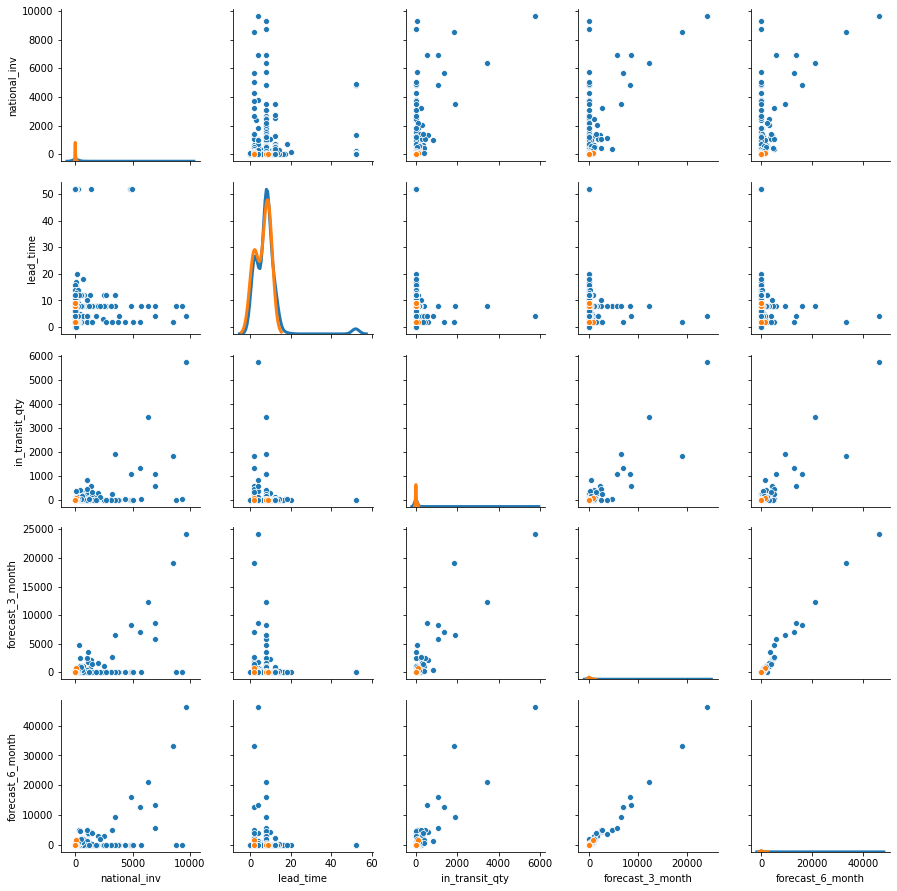

In [22]:
float_columns = list(filter(lambda i: dataset[i].dtype==np.float64, dataset.columns))
g = sns.PairGrid(dataset.sample(1000).dropna(), vars= float_columns[0:5], hue="went_on_backorder")
g.map_diag(sns.kdeplot, lw=3, legend=False)
g.map_offdiag(sns.scatterplot)

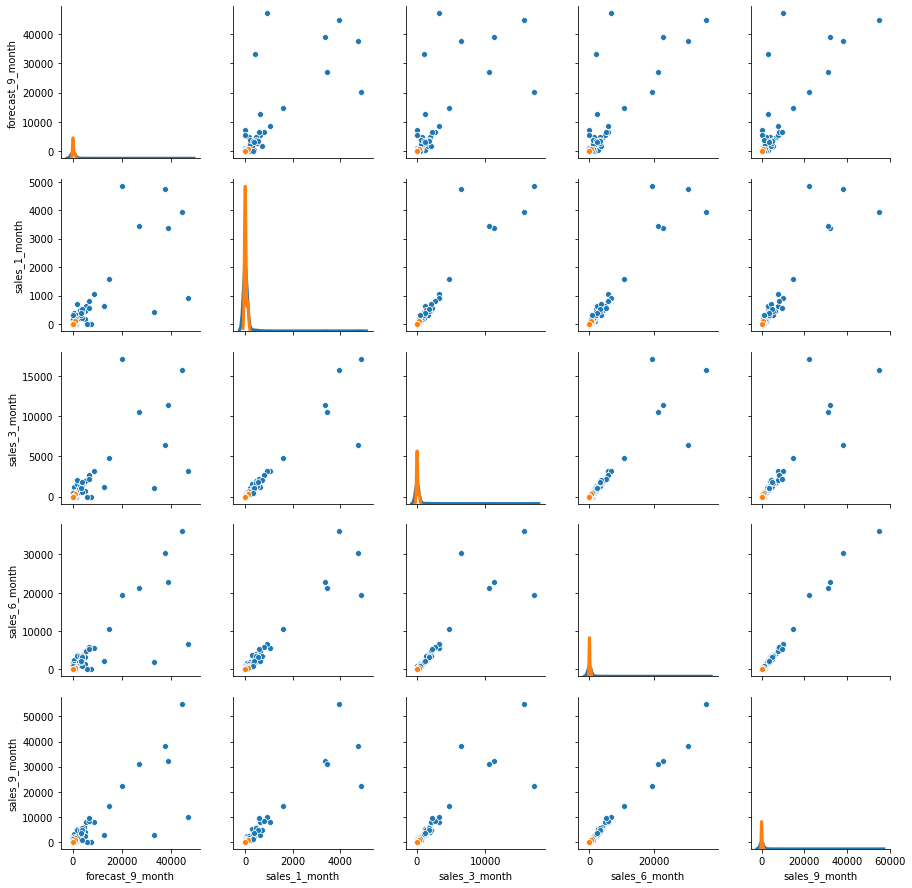

In [23]:
g = sns.PairGrid(dataset.sample(1000).dropna(), vars= float_columns[5:10], hue="went_on_backorder")
g.map_diag(sns.kdeplot, lw=3, legend=False)
g.map_offdiag(sns.scatterplot)

### Find unique values of string columns

Now try to make sure that these Yes/No columns really only contains Yes or No.  
If that's true, proceed to convert them into binaries (0s and 1s).

**Tip**: use [unique()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.unique.html) function of pandas Series.

Example

~~~python
print('went_on_backorder', dataset['went_on_backorder'].unique())
~~~

In [11]:
# All the column names of these yes/no columns
yes_no_columns = list(filter(lambda i: dataset[i].dtype!=np.float64, dataset.columns))
print(yes_no_columns)

# Add code below this comment  (Question #E102)
# ----------------------------------

for column in yes_no_columns:
    print(column,": ",dataset[column].unique())


['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder']
potential_issue :  ['No' 'Yes' nan]
deck_risk :  ['No' 'Yes' nan]
oe_constraint :  ['No' 'Yes' nan]
ppap_risk :  ['No' 'Yes' nan]
stop_auto_buy :  ['Yes' 'No' nan]
rev_stop :  ['No' 'Yes' nan]
went_on_backorder :  ['No' 'Yes' nan]


You may see **nan** also as possible values representing missing values in the dataset.

We fill them using most popular values, the [Mode](https://en.wikipedia.org/wiki/Mode_%28statistics%29) in Stats.

In [12]:
for column_name in yes_no_columns:
    mode = dataset[column_name].apply(str).mode()[0]
    print('Filling missing values of {} with {}'.format(column_name, mode))
    dataset[column_name].fillna(mode, inplace=True)

Filling missing values of potential_issue with No
Filling missing values of deck_risk with No
Filling missing values of oe_constraint with No
Filling missing values of ppap_risk with No
Filling missing values of stop_auto_buy with Yes
Filling missing values of rev_stop with No
Filling missing values of went_on_backorder with No


### Convert yes/no columns into binary (0s and 1s)

In [13]:
# Add code below this comment  (Question #E103)
# ----------------------------------

mappings = {"Yes":1,"No":0}

for column_name in yes_no_columns:
    dataset[column_name] = dataset[column_name].map(mappings)

    
dataset.head()
    


,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,2.0,9.0,0.0,5.0,7.0,8.0,3.0,6.0,8.0,10.0,...,0.0,0.85,0.83,0.0,0,0,0,1,0,0
1,0.0,12.0,0.0,5.0,7.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.73,0.76,0.0,1,0,0,1,0,0
2,473.0,8.0,23.0,480.0,960.0,1440.0,159.0,459.0,1041.0,1645.0,...,0.0,1.00,0.99,0.0,0,0,1,1,0,0
3,529.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,...,0.0,0.95,0.97,0.0,0,0,0,1,0,0
4,235.0,9.0,0.0,0.0,0.0,0.0,8.0,19.0,109.0,119.0,...,0.0,0.91,0.77,0.0,0,0,0,1,0,0


Now all columns should be either int64 or float64.

In [14]:
median = dataset.lead_time.median()
dataset.lead_time.fillna(median,inplace=True)

In [ ]:
dataset.fillna

In [16]:
dataset.dropna(inplace=True)

In [48]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   national_inv       1687860 non-null  float64
 1   lead_time          1586967 non-null  float64
 2   in_transit_qty     1687860 non-null  float64
 3   forecast_3_month   1687860 non-null  float64
 4   forecast_6_month   1687860 non-null  float64
 5   forecast_9_month   1687860 non-null  float64
 6   sales_1_month      1687860 non-null  float64
 7   sales_3_month      1687860 non-null  float64
 8   sales_6_month      1687860 non-null  float64
 9   sales_9_month      1687860 non-null  float64
 10  min_bank           1687860 non-null  float64
 11  potential_issue    1687861 non-null  int64  
 12  pieces_past_due    1687860 non-null  float64
 13  perf_6_month_avg   1687860 non-null  float64
 14  perf_12_month_avg  1687860 non-null  float64
 15  local_bo_qty       1687860 non-n

### Smartly sample the data into a more manageable size for cross-fold validation in Grid Search

**Note**: This is a good point to re-balance dataset before actually moving on. For sampling we can either take advantage of pandas/numpy `sample` method or use `imblearn` [package](https://imbalanced-learn.org/stable/user_guide.html#user-guide). 

`imblearn` module has implemented a pipeline on top sklearn pipeline, and it is possible to add sampling strategies within the `imblearn` pipeline. We are not required to use `imblearn` pipeline for this project. 

In [49]:
num_backorder = np.sum(dataset['went_on_backorder']==1)
print('backorder ratio:', num_backorder, '/', len(dataset), '=', num_backorder / len(dataset))

backorder ratio: 11293 / 1687861 = 0.006690716830355106


In [51]:
# Add code below this comment   (Question #E104) 
# ----------------------------------

from sklearn.utils import resample


dataset_majority = dataset[dataset.went_on_backorder == 0]
dataset_minority = dataset[dataset.went_on_backorder == 1]

dataset_downsampled = resample(dataset_majority,
                         replace=False,
                         n_samples=dataset_minority.shape[0]*2,
                         random_state=0)


dataset_downsampled = pd.concat([dataset_minority,dataset_downsampled])

X= dataset_downsampled.iloc[:,:-1]
y= dataset_downsampled.went_on_backorder

del dataset_majority, dataset_minority, dataset_downsampled



In [52]:
del dataset


**Note:** After sampling the data, you may want to write the data to a file for reloading later.

<span style="background: yellow;">If required, remove the `dataset` variable to avoid any memory-related issue.</span> 

In [59]:
# Write your smart sampling to local file  
# ----------------------------------

import joblib
joblib.dump([X,y],r"data/sampled_data.pkl")

['data/sampled_data.pkl']